In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

In [4]:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
value = df.mean()
std = df.std()
df_mean  = df.mean(axis=1)

ValueError: 'yerr' (shape: (3650,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (4,))

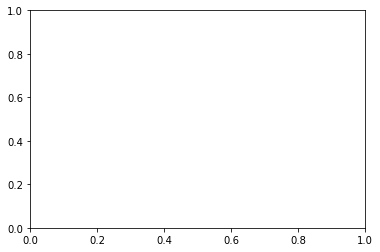

In [13]:
fig, ax = plt.subplots()
ax.bar(df.index, df_mean, yerr=std,)

([<matplotlib.axis.XTick at 0x7fdff04b0940>,
 [Text(1992, 0, '1992'),
  Text(1993, 0, '1993'),
  Text(1994, 0, '1994'),
  Text(1995, 0, '1995')])

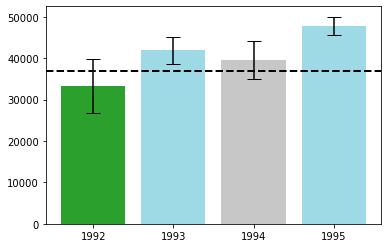

In [43]:
df_mean = df.mean(axis=1)
df_std = df.std(axis=1)/np.sqrt(df.shape[1])
# Choice of y value:
y = 37000 
norm = Normalize(vmin=-1.96, vmax=1.96)
# 'seismic', 'coolwarm', etc. are examples of available colour palettes.
cmap = get_cmap('tab20')
df_colors = pd.DataFrame([])
df_colors['intensity'] = norm((df_mean-y)/df_std) # Usual normalising formula.
df_colors['color'] = [cmap(x) for x in df_colors['intensity']] # Assign colour depending on norm value.
bar_plot = plt.bar(df.index, df_mean, yerr=df_std*1.96, color=df_colors['color'], capsize=7)
# axhline = Horizontal line.
hoz_line = plt.axhline(y=y, color='k', linewidth=2, linestyle='--')
# Add xticks
plt.xticks(df.index, ('1992', '1993', '1994', '1995'))